# SIMPLE SINGLE IRS SIMULATION

User positions:
 [[  94.3846121   101.71573499]
 [ 400.64490125  179.8020085 ]
 [  55.19682878  -38.11134463]
 [ 189.99285367 -338.56832582]
 [ -82.60295679 -449.64254276]
 [-211.55167574  307.33752377]
 [ 323.71350746  131.30439514]
 [ -57.29822684 -149.4390969 ]
 [ 221.76023496  163.13196342]
 [ 129.42437689 -383.09469829]
 [ -38.87977683  385.79655278]
 [-190.37604157 -353.84221719]
 [ 142.47130376  345.02401047]
 [ 334.74205017   -7.53700486]
 [  76.19768526 -466.0426909 ]
 [ 277.33890031  -26.06471458]
 [-187.26084242  328.83698312]
 [ 195.00068697  373.98843298]
 [-353.85205034 -185.15560166]
 [-192.81579507   38.86988345]
 [-464.02604935 -164.47216068]
 [-211.81773367  -49.61768641]
 [-375.92549289   30.26892893]
 [ 398.96102744  -65.35817379]
 [ 374.06367482 -182.94076299]
 [-477.94771933 -129.67595138]
 [-313.94914156   90.54413828]
 [  14.53963012 -394.20566404]
 [  29.00590746 -258.76326246]
 [-153.30834996 -170.59925378]
 [-370.47270912  153.09682554]
 [-168.91043055 -383.7

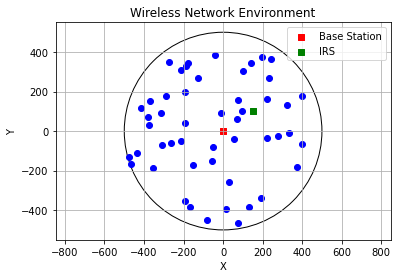

Link Budget: 
[-27.34780343 -41.73238204 -28.17521507 -45.98358745 -52.20566936
 -44.99485584 -36.5602736  -39.91221494 -29.60508849 -44.05006192
 -44.37617019 -47.03549681 -37.00994983 -44.67025422 -49.97954434
 -36.25385622 -45.02243601 -42.3790175  -49.03718736 -38.11204651
 -46.85595221 -40.95999398 -45.47053976 -42.25021193 -49.87551611
 -46.82779062 -45.8324819  -46.76266336 -40.87328986 -41.28456368
 -42.63518229 -53.70690091 -46.90466947 -36.47092884 -46.11867516
 -28.70550019 -47.67861557 -34.01480926 -43.95576994 -27.82731799
 -48.96658338 -25.64687455 -32.09270272 -50.08853298 -45.20114225
 -30.90773686 -24.49249423 -38.02899931 -40.7255413  -29.20913546]
(1, 50)

SNR of all users (in dB): 
[105.65219657  91.26761796 104.82478493  87.01641255  80.79433064
  88.00514416  96.4397264   93.08778506 103.39491151  88.94993808
  88.62382981  85.96450319  95.99005017  88.32974578  83.02045566
  96.74614378  87.97756399  90.6209825   83.96281264  94.88795349
  86.14404779  92.0400060

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import cmath
import random

from Functions import *

# Constants
GRID_RADIUS = 500
NUM_USERS_NEW = 50
BASE_STATION_POSITION = (0, 0)
TRANSMIT_POWER_WATTS = 2 #in watts
FADING_STD_MEAN = 0
FADING_STD_DEV = 3
BANDWIDTH = 50*(10**6) #in Hz
RATE_THRESHOLD = 30

IRS_POSITION = (150,100)
N = 10 #Number of IRS elements
PATH_LOSS_EXPONENT = 3.5 #path loss exponent (direct)
BETA = 2 #path loss exponent (indirect)
m = 1.0 #Shape for nakagami
omega = 1.0 #Param for nakagami

# threshold_min = 11.5
# threshold_max = 28.5

# Generate user positions
user_positions = generate_user_positions(NUM_USERS_NEW, GRID_RADIUS)
print('User positions:'"\n", user_positions)
print()

# Generate base station positions
base_station_position = generate_station_positions(BASE_STATION_POSITION)

# Generate IRS
irs_position = generate_IRS(IRS_POSITION)

# Compute the distances from each user to the base station
d_m = compute_distances(user_positions, base_station_position)
d_m = d_m.reshape(1,NUM_USERS_NEW)
print('d_m:'"\n", d_m)
print(np.shape(d_m)) 
print()

# Compute the distances from each user to the IRS
d_rm = compute_distances(user_positions, irs_position)
d_rm = d_rm.reshape(1,NUM_USERS_NEW)
print('d_rm:'"\n", d_rm)
print(np.shape(d_rm)) 
print()

# Compute the distances from base_station to the IRS
d_i = compute_distances(base_station_position, irs_position)
d_i = d_i.reshape(-1, 1)
print('d_i:'"\n", d_i)
print(np.shape(d_i)) 
print()

# Generate the Rayleigh Fading Channel for each user
h_m = generate_rayleigh_fading_channel(NUM_USERS_NEW, FADING_STD_MEAN, FADING_STD_DEV)
h_m = h_m.reshape(1,-1)
print('h_m:'"\n", h_m)
print(np.shape(h_m))    
print()

f_m = []
fading = []
for user in range(NUM_USERS_NEW):
    fading.append(generate_nakagami_samples(m, omega, N))
f_m = np.array(fading)
print('f_m:'"\n",f_m) 
print(np.shape(f_m))   
print()

f_m_transpose = np.transpose(f_m)
print('f_m_transpose:'"\n",f_m_transpose) 
print(np.shape(f_m_transpose))  
print()

# Generate the Nakagami Channel from base_station to the IRS (g)
g = generate_nakagami_samples(m, omega, N)
g = g.reshape(N,1)
print('g:'"\n", g) 
print(np.shape(g)) 
print()

# Initialize an empty list to store the results for each column
results_list = []

# Loop over each column index
for column_index in range(NUM_USERS_NEW):
    # Extract the single column from f_m_transpose using indexing and transpose
    single_column = f_m_transpose[:, column_index]
    single_column = single_column.reshape(1, N)  # Reshape to (1, N)

    # Perform element-wise multiplication of the single row with g
    result = np.dot(single_column, g)
    results_list.append(result)

# Convert the list of results into a numpy array
results_array = np.squeeze(results_list)
results_array = results_array.reshape(1,NUM_USERS_NEW)
# print()
# print('Results array:', results_array)
# print('Shape of results array:', results_array.shape) 

# Determine the angle associated with each complex number in radians
angles_radians = np.angle(results_array)
print('Phases of results array:'"\n", angles_radians) 
print()
print('Phases of nullifying array:'"\n", -1*angles_radians) 
print()

# Compute the array that will nullify the angle/phase to give us the scalar value
r = 1
exp_results = r * np.exp(1j *-1*angles_radians)

# Print the polar form of the complex numbers
for i in range(len(exp_results)):
    print(f"Nullifying array output: \n{exp_results[i]}")

# Compute the product that will nullify the angle/phase to give us the scalar value
product = exp_results * results_array
product_numerator = product.real
print()
print('Product : '"\n", product)
print('Product numerator: '"\n", product_numerator)
print(np.shape(product_numerator)) 

link_inter = []

for i in range(NUM_USERS_NEW):
    link_inter_value = (TRANSMIT_POWER_WATTS)**0.5 * (((h_m[0][i])/(d_m[0][i])**PATH_LOSS_EXPONENT + (product_numerator[0][i])/((d_rm[0][i])**BETA * (d_i)**BETA)))
    link_inter.append(link_inter_value)  # Append the computed value to the list

# Convert the list to a numpy array
link_inter = np.array(link_inter)
link_inter_array = link_inter.reshape(1,NUM_USERS_NEW)

# Calculate link_budget using the updated link_inter array
link_budget = 10 * np.log10(link_inter_array) + 30 
link_budget = link_budget.reshape(1,NUM_USERS_NEW)

#Calculate the noise value
noise = -133 # in dBm

SNR_matrix = []

# Calculate SNR
for i in range(NUM_USERS_NEW):
    SNR = compute_SNR(link_budget[0][i], noise)
    SNR_matrix.append(SNR)

SNR_matrix = np.array(SNR_matrix)
SNR_matrix = SNR_matrix.reshape(1,NUM_USERS_NEW)

# Calculate rate 
rate_matrix = compute_rate(SNR_matrix)

outage_probability = 0.0
# # Compute the outage probability
outage_probability = compute_outage_probability(NUM_USERS_NEW, rate_matrix.flatten(), RATE_THRESHOLD)
# Plot the grid, base station, and user positions
fig, ax = plt.subplots()
circle = plt.Circle((0, 0), GRID_RADIUS, edgecolor='black', facecolor='none')
ax.add_patch(circle)
plt.scatter(0, 0, color='red', marker='s', label='Base Station')
plt.scatter(IRS_POSITION[0], IRS_POSITION[1], color='green', marker='s', label='IRS')
plt.scatter(user_positions[:, 0], user_positions[:, 1], color='blue', marker='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Wireless Network Environment')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

# Print link budget values
print('Link Budget: ') 
for element in link_budget:
    print(element)
print(np.shape(link_budget)) 
print() 

# Print SNR values
print('SNR of all users (in dB): ')
for element in SNR_matrix:
    print(element)
print(np.shape(SNR_matrix)) 
print() 

# Print rate values
print('Rate of all users (in bps/Hz): ')
for element in rate_matrix:
    print(element)
print(np.shape(rate_matrix)) 

print()
print('Outage probability for the simulated environment: '"{:.3f}".format(outage_probability))

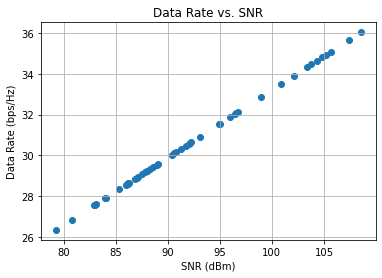

In [3]:
plt.scatter(SNR_matrix, rate_matrix)
plt.xlabel('SNR (dBm)')
plt.ylabel('Data Rate (bps/Hz)')
plt.title('Data Rate vs. SNR')
plt.grid(True)
plt.show()

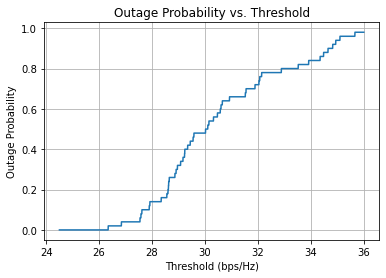

In [5]:
# Assuming you have an array 'threshold' containing the threshold values
threshold = np.arange(24.5,36, 0.001)

outage_probability = np.zeros(len(threshold))

# Calculating the outage probability for each threshold
for i in range(len(threshold)):
    outage_probability[i] = np.mean(rate_matrix.flatten() <= threshold[i])

# Plotting the outage probability vs. threshold
plt.plot(threshold, outage_probability)
plt.xlabel('Threshold (bps/Hz)')
plt.ylabel('Outage Probability')
plt.title('Outage Probability vs. Threshold')
plt.grid(True)
plt.show()

# BASIC SETUP FOR 100 SIMULATIONS FOR SINGLE CELL (WITH & WITHOUT IRS)

d_m:
 [[437.62886705 190.89055036 317.90841247 499.13584097 380.0767774
  432.34793434 412.02614748 483.84657071 325.5833518  277.17197871
  403.67430742 444.05104463 376.26222858 160.67831271 378.08508787
  455.40859936 345.60770377 348.86684605 302.0806419  458.93915729
  492.86896966 277.73152576 369.57347019 295.04057485 421.95169704
  312.98321503 495.96120346 156.27326796 328.8030332   98.91150891]]
(1, 30)

d_rm:
 [[446.4449005  186.32970326 306.38222063 471.40015368 403.75028519
  404.08713906 435.78183534 480.98741901 349.26544861 261.66630536
  424.03293136 455.17348508 403.36118244 188.63473962 355.99758968
  427.59959894 356.17262267 375.0217263  274.42658486 442.30214529
  485.34965335 253.77641321 373.32565639 272.34773589 396.04663054
  329.72096813 510.93869967 183.57720842 305.68599895 126.98987682]]
(1, 30)

d_i:
 [[28.28427125]]
(1, 1)



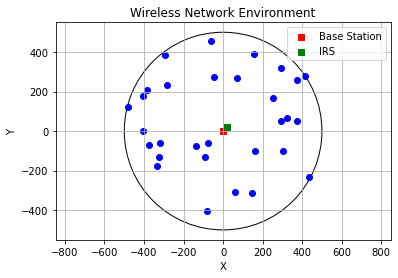

In [18]:
# Constants
GRID_RADIUS = 500
NUM_USERS_NEW = 30
BASE_STATION_POSITION = (0, 0)
TRANSMIT_POWER_WATTS = 2 #in watts
FADING_STD_MEAN = 0
FADING_STD_DEV = 3
BANDWIDTH = 50*(10**6) #in Hz
RATE_THRESHOLD = 30

IRS_POSITION = (20,20)
N = 10 #Number of IRS elements
PATH_LOSS_EXPONENT = 3.5 #path loss exponent (direct)
BETA = 2 #path loss exponent (indirect)
m = 1.0 #Shape for nakagami
omega = 1.0 #Param for nakagami

# threshold_min = 11.5
# threshold_max = 28.5

# Generate user positions
user_positions = generate_user_positions(NUM_USERS_NEW, GRID_RADIUS)

# Generate base station positions
base_station_position = generate_station_positions(BASE_STATION_POSITION)

# Generate IRS
irs_position = generate_IRS(IRS_POSITION)

# Compute the distances from each user to the base station
d_m = compute_distances(user_positions, base_station_position)
d_m = d_m.reshape(1,NUM_USERS_NEW)
print('d_m:'"\n", d_m)
print(np.shape(d_m)) 
print()

# Compute the distances from each user to the IRS
d_rm = compute_distances(user_positions, irs_position)
d_rm = d_rm.reshape(1,NUM_USERS_NEW)
print('d_rm:'"\n", d_rm)
print(np.shape(d_rm)) 
print()

# Compute the distances from base_station to the IRS
d_i = compute_distances(base_station_position, irs_position)
d_i = d_i.reshape(-1, 1)
print('d_i:'"\n", d_i)
print(np.shape(d_i)) 
print()

# Plot the grid, base station, and user positions
fig, ax = plt.subplots()
circle = plt.Circle((0, 0), GRID_RADIUS, edgecolor='black', facecolor='none')
ax.add_patch(circle)
plt.scatter(0, 0, color='red', marker='s', label='Base Station')
plt.scatter(IRS_POSITION[0], IRS_POSITION[1], color='green', marker='s', label='IRS')
plt.scatter(user_positions[:, 0], user_positions[:, 1], color='blue', marker='o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Wireless Network Environment')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

# 100 SIMULATIONS FOR SINGLE CELL (W/O IRS)

In [19]:
NUM_SIMULATIONS = 50

# Initialize list to store individual outage probabilities
outage_probabilities_1 = []

# Perform simulations
for i in range(NUM_SIMULATIONS):
    
    # Generate the Rayleigh Fading Channel for each user to the base station
    rayleigh_channel = generate_rayleigh_fading_channel(NUM_USERS_NEW, FADING_STD_MEAN, FADING_STD_DEV)
    
    # Calculate link budget
    link_budget_1 = calc_link_budget(rayleigh_channel, d_m.flatten(), PATH_LOSS_EXPONENT, TRANSMIT_POWER_WATTS)
    
    # Calculate SNR
    SNR_1 = compute_SNR(link_budget_1, noise)

    # Calculate rate 
    rate = compute_rate(SNR_1)
    
    # Compute outage probability at each iteration
    outage_probability_1 = compute_outage_probability(NUM_USERS_NEW, rate, RATE_THRESHOLD)
    outage_probabilities_1.append(outage_probability_1)
    
# Compute average outage probability
average_outage_probability_1 = compute_average_outage_probability(outage_probabilities_1)
print()
print('Average Outage Probability (Only BS): ', "{:.3f}".format(average_outage_probability_1))


Average Outage Probability (Only BS):  0.665


# 100 SIMULATIONS FOR SINGLE CELL (WITH IRS)

In [20]:
# Initialize list to store individual outage probabilities
outage_probabilities_2 = []

#Performing for IRS
h_m = np.array(rayleigh_channel)
h_m = h_m.reshape(1,-1)

# Perform simulations
for i in range(NUM_SIMULATIONS):
    # Generate the Nakagami Channel from each user to the IRS (f_m)
    f_m = []
    fading = []
    for user in range(NUM_USERS_NEW):
        fading.append(generate_nakagami_samples(m, omega, N))
    f_m = np.array(fading)
    
    f_m_transpose = np.transpose(f_m)
    # Generate the Nakagami Channel from base_station to the IRS (g)
    g = generate_nakagami_samples(m, omega, N)
    g = g.reshape(N,1)
    
    # Initialize an empty list to store the results for each column
    results_list = []
    
    # Loop over each column index
    for column_index in range(NUM_USERS_NEW):
        
        # Extract the single column from f_m_transpose using indexing and transpose
        single_column = f_m_transpose[:, column_index]
        single_column = single_column.reshape(1, N)  # Reshape to (1, N)
        
        # Perform element-wise multiplication of the single row with g
        result = np.dot(single_column, g)
        results_list.append(result)
        
    # Convert the list of results into a numpy array
    results_array = np.squeeze(results_list)
    results_array = results_array.reshape(1,NUM_USERS_NEW)
    
    # Determine the angle associated with each complex number in radians
    angles_radians = np.angle(results_array)
    
    # Compute the array that will nullify the angle/phase to give us the scalar value
    r = 1
    polar_results = r * np.exp(1j *-1*angles_radians)
    
    # Compute the product that will nullify the angle/phase to give us the scalar value
    product = polar_results * results_array
    product_numerator = product.real
    
    # Compute the interediate link budget (in watts) for each user in the system
    link_inter = []
    for j in range(NUM_USERS_NEW):
        link_inter_value = (TRANSMIT_POWER_WATTS)**0.5 * (((h_m[0][j])/(d_m[0][j])**PATH_LOSS_EXPONENT + (product_numerator[0][j])/((d_rm[0][j])**BETA * (d_i)**BETA)))
        link_inter.append(link_inter_value)  # Append the computed value to the list
        
    # Convert the list to a numpy array
    link_inter = np.array(link_inter)
    link_inter_array = link_inter.reshape(1,NUM_USERS_NEW)
    
    # Calculate link_budget using the updated link_inter array
    link_budget = 10 * np.log10(link_inter_array) + 30  # Need to add actual noise power
    link_budget = link_budget.reshape(1,NUM_USERS_NEW)
    
    #Calculate the noise value
    noise = -133 # in dBm
    
    SNR_matrix = []
    # Calculate SNR
    for k in range(NUM_USERS_NEW):
        SNR = compute_SNR(link_budget[0][k], noise)
        SNR_matrix.append(SNR)
    
    SNR_matrix = np.array(SNR_matrix)
    SNR_matrix = SNR_matrix.reshape(1,NUM_USERS_NEW)
    
    # Calculate rate 
    rate_matrix = compute_rate(SNR_matrix)
    rate_matrix_new = rate_matrix.flatten()
    
    # Compute outage probability at each iteration
    outage_probability_2 = compute_outage_probability(NUM_USERS_NEW, rate_matrix_new, RATE_THRESHOLD)
    outage_probabilities_2.append(outage_probability_2)
    # print('Outage probability for the simulation number', i+1, 'is', outage_probability)
    
# Compute average outage probability
average_outage_probability_2 = compute_average_outage_probability(outage_probabilities_2)
print()
print('Average Outage Probability (BS + IRS): ', "{:.3f}".format(average_outage_probability_2))


Average Outage Probability (BS + IRS):  0.012
